In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

# 모든 전처리

In [4]:
same_df = pd.read_csv('/content/drive/MyDrive/one_hot_same.csv')
int_df = pd.read_csv('/content/drive/MyDrive/one_hot_int.csv')

In [5]:
features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican', 'US_President_Democratic', 'KR_President_Democratic', 'KR_President_Conservative', 'KR_President_Neutral']
target = ['Close']

In [6]:
X_data = same_df[features]
y_data = same_df[target]

gain을 사용해야할듯

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5007
[LightGBM] [Info] Number of data points in the train set: 5865, number of used features: 35
[LightGBM] [Info] Start training from score 10.000339


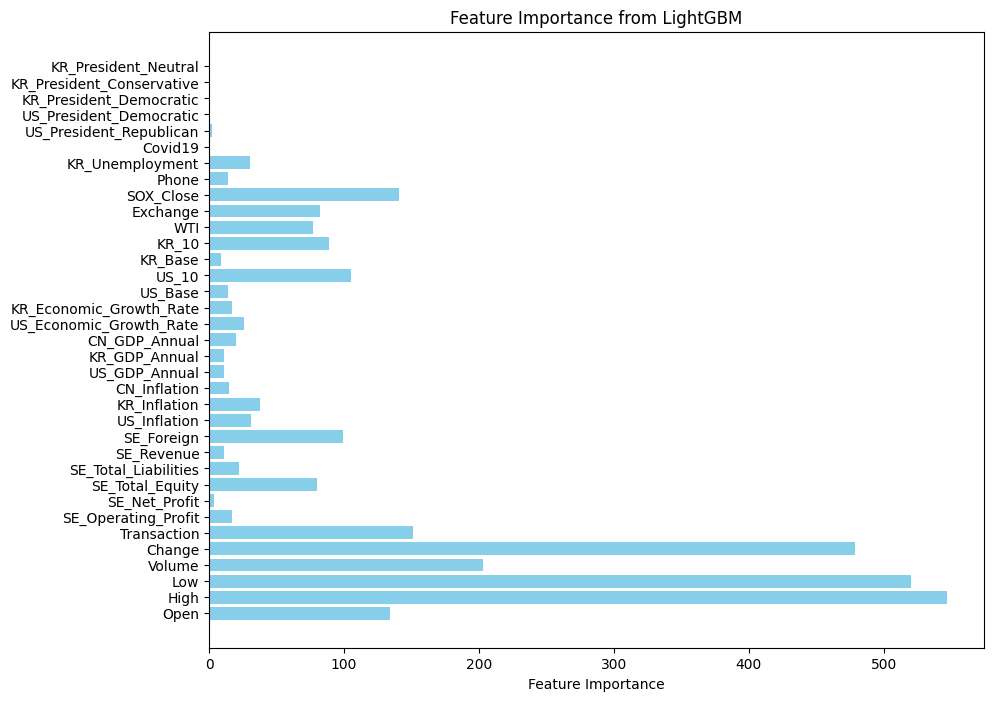

In [7]:
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt

lgb_data = lgb.Dataset(X_data, label=y_data)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'seed': 42
}

model = lgb.train(params, lgb_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = X_data.columns

# 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001791 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5007
[LightGBM] [Info] Number of data points in the train set: 5865, number of used features: 35
[LightGBM] [Info] Start training from score 10.000339


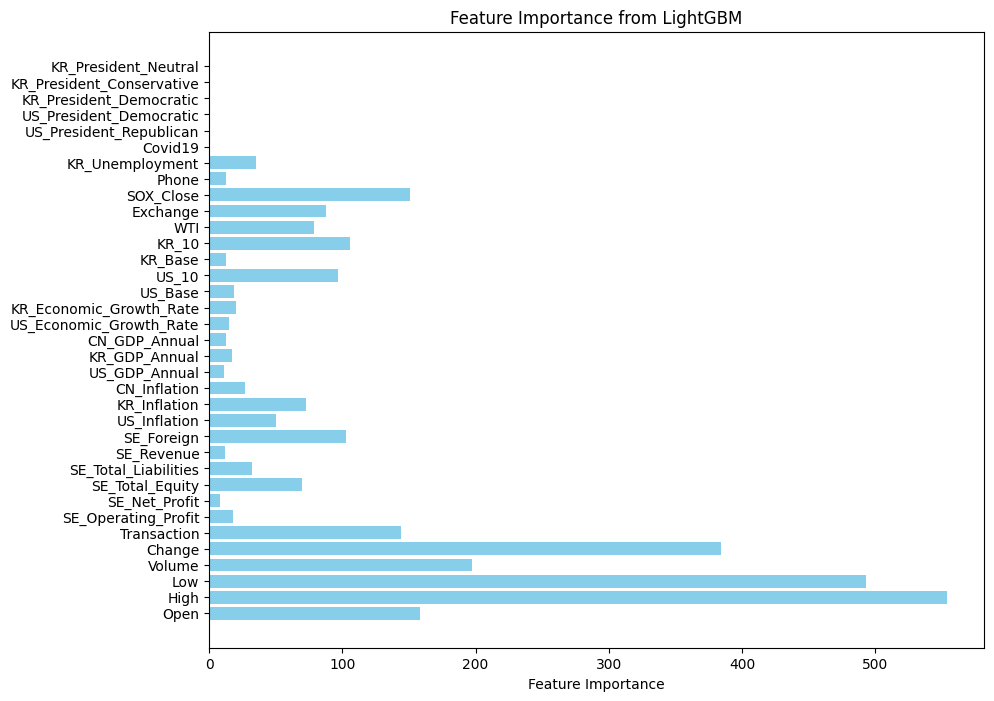

In [26]:
lgb_data = lgb.Dataset(X_data, label=y_data)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,   # 피처 샘플링 비율
    'bagging_fraction': 0.8,   # 데이터 샘플링 비율
    'bagging_freq': 5,
    'seed': 42
}

model = lgb.train(params, lgb_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = X_data.columns

# 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

In [8]:
X_data_int = int_df[features]
y_data_int = int_df[target]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6941
[LightGBM] [Info] Number of data points in the train set: 5865, number of used features: 35
[LightGBM] [Info] Start training from score 10.000339


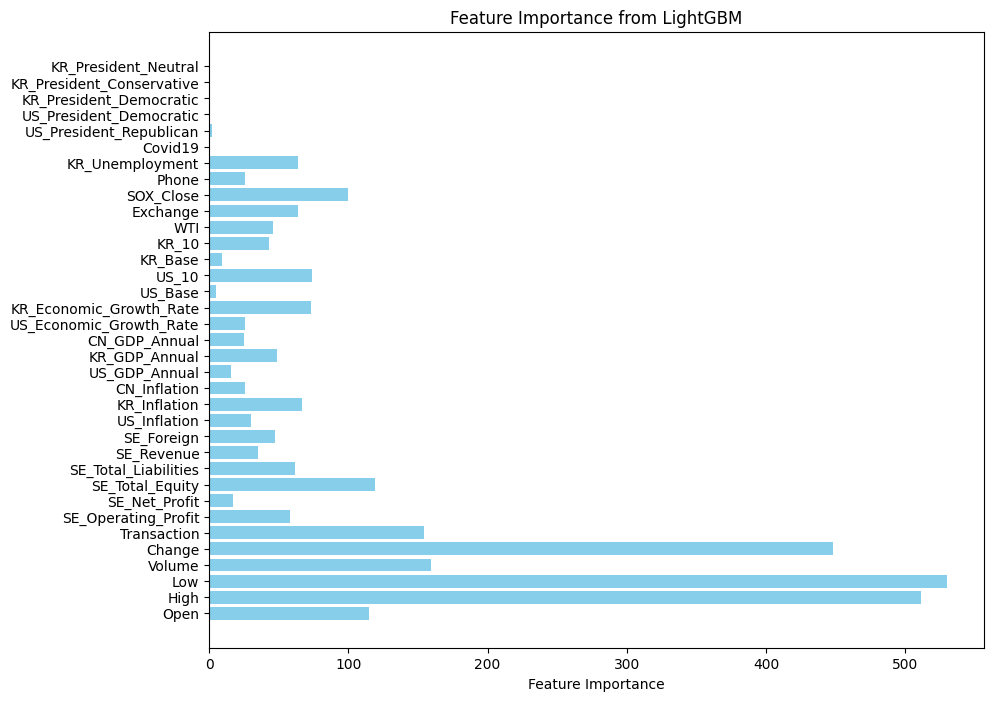

In [9]:
lgb_data = lgb.Dataset(X_data_int, label=y_data_int)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'seed': 42
}

model = lgb.train(params, lgb_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = X_data_int.columns

# 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6941
[LightGBM] [Info] Number of data points in the train set: 5865, number of used features: 35
[LightGBM] [Info] Start training from score 10.000339


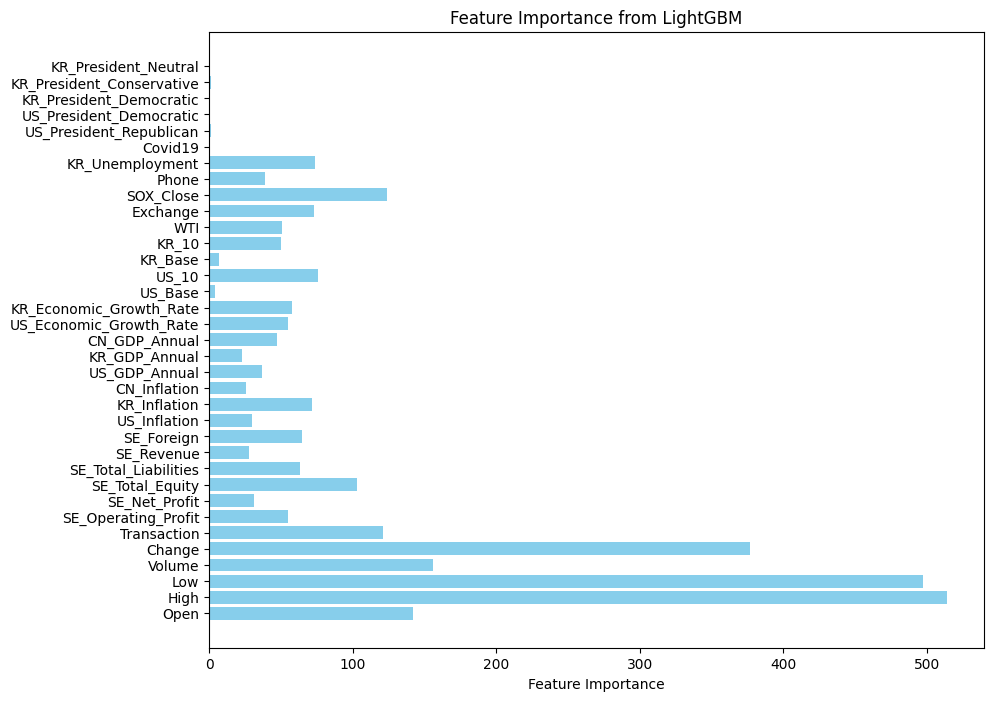

In [10]:
lgb_data = lgb.Dataset(X_data_int, label=y_data_int)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,   # 피처 샘플링 비율
    'bagging_fraction': 0.8,   # 데이터 샘플링 비율
    'bagging_freq': 5,
    'seed': 42
}

model = lgb.train(params, lgb_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = X_data_int.columns

# 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

In [11]:
final_same_df = pd.read_csv('/content/drive/MyDrive/final_final_same.csv')
final_int_df = pd.read_csv('/content/drive/MyDrive/final_final_int.csv')

In [12]:
final_features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican', 'US_President_Democratic', 'KR_President_Democratic', 'KR_President_Conservative', 'KR_President_Neutral']
final_target = ['Close']

In [13]:
final_X_data = same_df[features]
final_y_data = same_df[target]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5007
[LightGBM] [Info] Number of data points in the train set: 5865, number of used features: 35
[LightGBM] [Info] Start training from score 10.000339


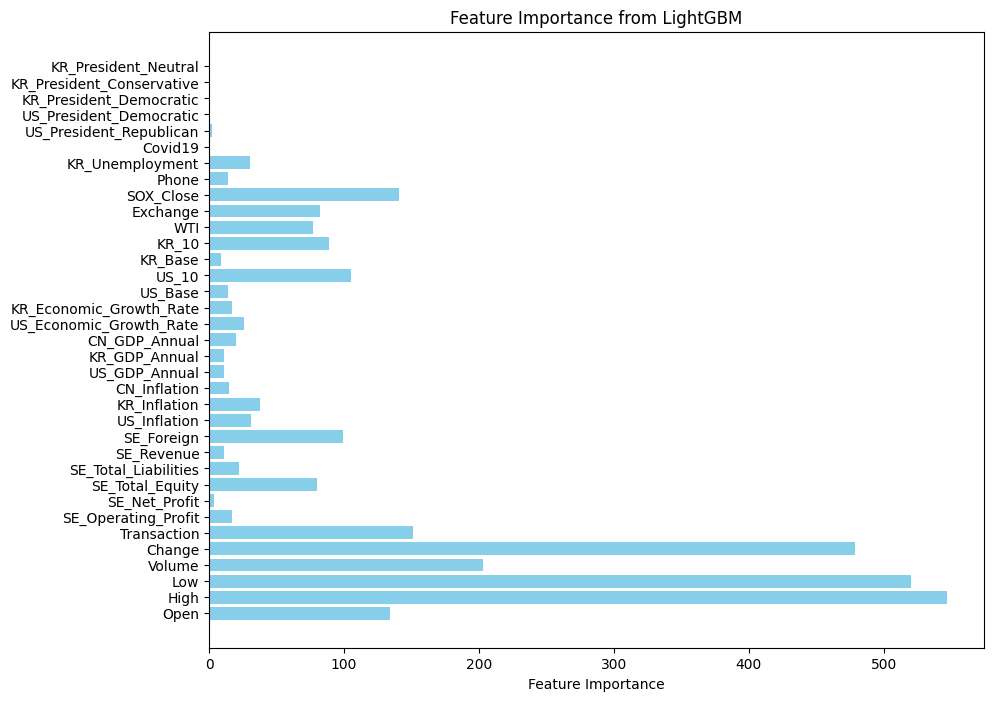

In [14]:
lgb_data = lgb.Dataset(final_X_data, label=final_y_data)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'seed': 42
}

model = lgb.train(params, lgb_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = final_X_data.columns

# 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

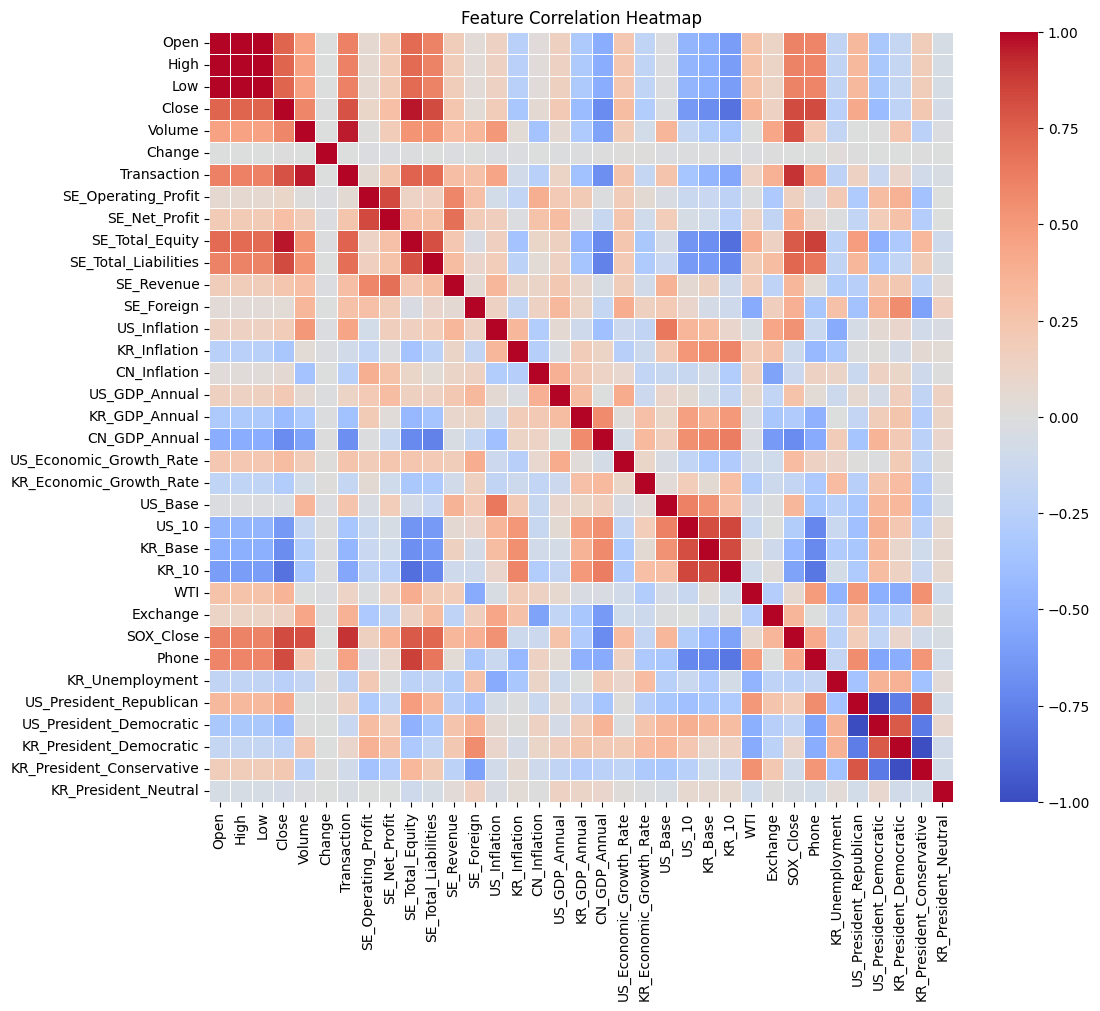

In [16]:
import seaborn as sns

# 숫자형 데이터만 선택
numeric_columns = same_df.select_dtypes(include=['number'])

# 상관계수 계산
correlation_matrix = numeric_columns.corr()

# 상관계수 히트맵 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [17]:
same_df['Covid19'] = same_df['Covid19'].apply(lambda x: 1 if x else 0)
int_df['Covid19'] = int_df['Covid19'].apply(lambda x: 1 if x else 0)

In [18]:
boolean_columns = [
    "Covid19",
    "US_President_Republican",
    "US_President_Democratic",
    "KR_President_Democratic",
    "KR_President_Conservative",
    "KR_President_Neutral"
]

same_df[boolean_columns] = same_df[boolean_columns].astype(bool)
int_df[boolean_columns] = int_df[boolean_columns].astype(bool)

In [19]:
same_df.set_index('Date', inplace = True)
int_df.set_index('Date', inplace = True)

In [20]:
train_same_df = same_df.iloc[:3519]
val_same_df = same_df.iloc[3519:4692]
test_same_df = same_df.iloc[4692:]

In [21]:
X_train, y_train = train_same_df[features], train_same_df[target]
X_val, y_val = val_same_df[features], val_same_df[target]
X_test, y_test = test_same_df[features], test_same_df[target]

#train_data = lgb.Dataset(X_train, label=y_train)
#val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4272
[LightGBM] [Info] Number of data points in the train set: 3519, number of used features: 34
[LightGBM] [Info] Start training from score 9.445810


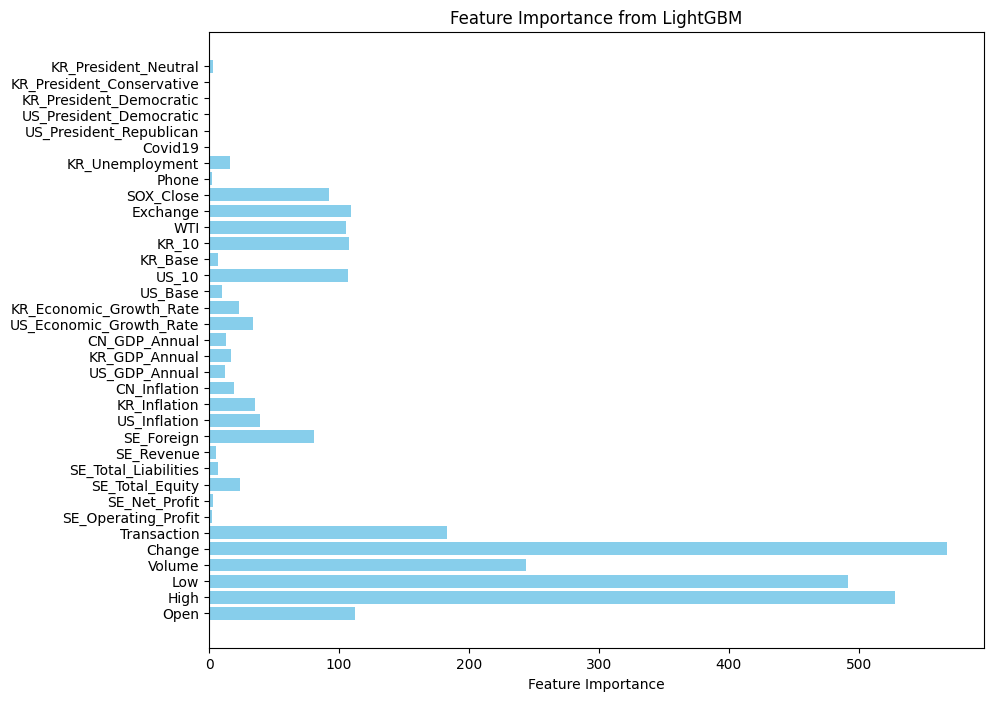

In [23]:
train_data = lgb.Dataset(X_train, label=y_train)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'seed': 42
}

model = lgb.train(params, train_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = final_X_data.columns

# 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4272
[LightGBM] [Info] Number of data points in the train set: 3519, number of used features: 34
[LightGBM] [Info] Start training from score 9.445810


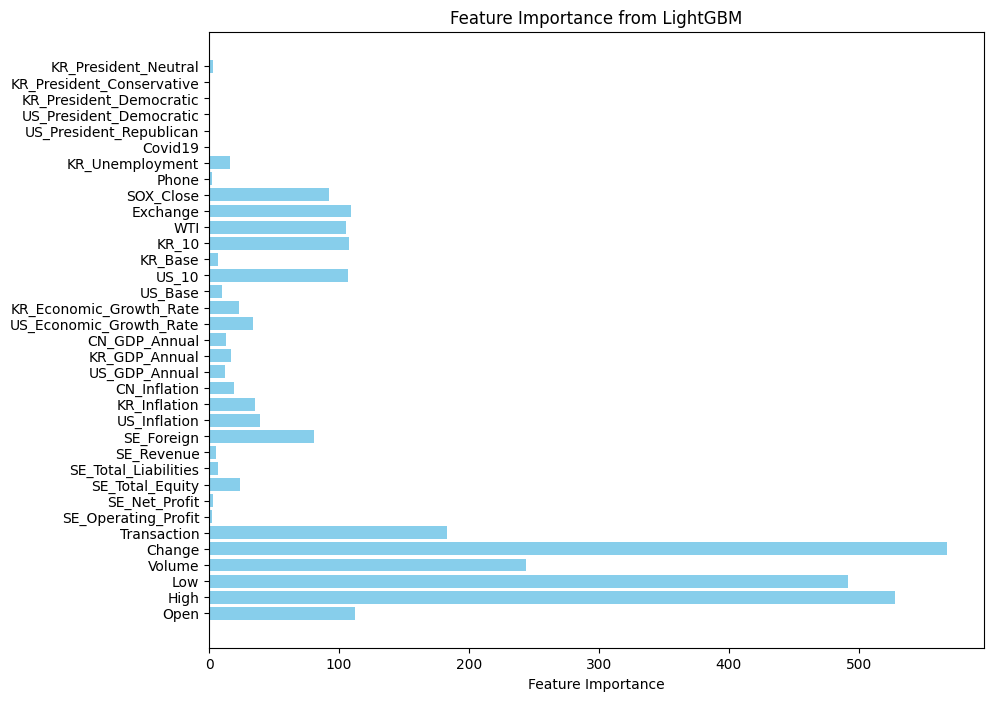

In [24]:
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'seed': 42
}

model = lgb.train(params, train_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = final_X_data.columns

# 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

NameError: name 'int_df' is not defined

# Outlier 전

In [ ]:
same = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/final_final_same.csv')

In [ ]:
interp = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/final_final_int.csv')